In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('spam.csv',usecols=[0, 1], names=['label', 'message'], encoding='Windows-1252', skiprows=1)
#encoding='Windows-1252' specifies the character encoding used to read the file. 
# The original spam.csv uses Windows-1252 encoding (common in old Windows systems), not UTF-8. 
#Here 'utf-8' will raise an error if the file contains incompatible characters.

In [3]:
df.shape

(5572, 2)

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
X=df.iloc[:,1]
y=df.iloc[:,0]

In [27]:
X.shape, y.shape

((5572,), (5572,))

In [6]:
tokenizer=Tokenizer(oov_token='UNK')
#out of vocabulary token ie not present in Train data
#in Test dataset replace all oov words with 'UNK'

In [7]:
tokenizer.fit_on_texts(X)
#to give each word a unique integer value

In [8]:
tokenizer.word_index

{'UNK': 1,
 'i': 2,
 'to': 3,
 'you': 4,
 'a': 5,
 'the': 6,
 'u': 7,
 'and': 8,
 'in': 9,
 'is': 10,
 'me': 11,
 'my': 12,
 'for': 13,
 'your': 14,
 'it': 15,
 'of': 16,
 'call': 17,
 'have': 18,
 'on': 19,
 '2': 20,
 'that': 21,
 'now': 22,
 'are': 23,
 'so': 24,
 'but': 25,
 'not': 26,
 'or': 27,
 'do': 28,
 'can': 29,
 'at': 30,
 "i'm": 31,
 'get': 32,
 'be': 33,
 'will': 34,
 'if': 35,
 'ur': 36,
 'with': 37,
 'just': 38,
 'no': 39,
 'we': 40,
 'this': 41,
 'gt': 42,
 '4': 43,
 'lt': 44,
 'up': 45,
 'when': 46,
 'ok': 47,
 'free': 48,
 'from': 49,
 'how': 50,
 'go': 51,
 'all': 52,
 'out': 53,
 'what': 54,
 'know': 55,
 'like': 56,
 'good': 57,
 'then': 58,
 'got': 59,
 'was': 60,
 'come': 61,
 'its': 62,
 'am': 63,
 'time': 64,
 'only': 65,
 'day': 66,
 'love': 67,
 'there': 68,
 'send': 69,
 'he': 70,
 'want': 71,
 'text': 72,
 'as': 73,
 'txt': 74,
 'one': 75,
 'going': 76,
 'by': 77,
 'home': 78,
 "i'll": 79,
 'need': 80,
 'about': 81,
 'r': 82,
 'lor': 83,
 'sorry': 84,
 'sto

In [9]:
tokenizer.word_counts

OrderedDict([('go', 280),
             ('until', 27),
             ('jurong', 1),
             ('point', 13),
             ('crazy', 15),
             ('available', 18),
             ('only', 218),
             ('in', 898),
             ('bugis', 7),
             ('n', 152),
             ('great', 115),
             ('world', 37),
             ('la', 7),
             ('e', 96),
             ('buffet', 2),
             ('cine', 7),
             ('there', 202),
             ('got', 239),
             ('amore', 1),
             ('wat', 99),
             ('ok', 287),
             ('lar', 38),
             ('joking', 6),
             ('wif', 27),
             ('u', 1172),
             ('oni', 4),
             ('free', 284),
             ('entry', 26),
             ('2', 515),
             ('a', 1433),
             ('wkly', 14),
             ('comp', 12),
             ('to', 2242),
             ('win', 75),
             ('fa', 4),
             ('cup', 8),
             ('final', 18),
        

In [10]:
seq=tokenizer.texts_to_sequences(X)

In [11]:
seq

[[51,
  470,
  4411,
  842,
  752,
  658,
  65,
  9,
  1325,
  90,
  122,
  350,
  1326,
  148,
  2988,
  1327,
  68,
  59,
  4412,
  145],
 [47, 337, 1496, 471, 7, 1930],
 [48,
  487,
  9,
  20,
  5,
  797,
  900,
  3,
  179,
  1931,
  1200,
  659,
  1932,
  2321,
  268,
  2322,
  72,
  1931,
  3,
  1933,
  3,
  338,
  487,
  555,
  956,
  74,
  389,
  180,
  660,
  390,
  2989],
 [7, 246, 153, 24, 380, 2990, 7, 141, 155, 58, 153],
 [1019, 2, 99, 108, 70, 488, 3, 957, 70, 1934, 219, 112, 472],
 [798,
  128,
  68,
  1684,
  146,
  109,
  161,
  1935,
  22,
  8,
  39,
  339,
  88,
  901,
  56,
  116,
  412,
  4,
  45,
  13,
  15,
  86,
  1936,
  47,
  381,
  956,
  4413,
  3,
  69,
  323,
  231,
  3,
  2991],
 [212, 12, 633, 10, 26, 56, 3, 382, 37, 11, 110, 719, 11, 56, 4414, 4415],
 [73,
  235,
  14,
  1201,
  2323,
  2324,
  1937,
  2325,
  2326,
  2327,
  799,
  120,
  109,
  609,
  73,
  14,
  1020,
  13,
  52,
  1685,
  843,
  413,
  3,
  1100,
  14,
  247,
  1020],
 [720,
  73,
  

In [12]:
seq=pad_sequences(seq,padding='post')

In [13]:
seq

array([[  51,  470, 4411, ...,    0,    0,    0],
       [  47,  337, 1496, ...,    0,    0,    0],
       [  48,  487,    9, ...,    0,    0,    0],
       ...,
       [8919,   60,    9, ...,    0,    0,    0],
       [   6,  534,  115, ...,    0,    0,    0],
       [2678,   62,  485, ...,    0,    0,    0]])

In [14]:
seq.shape

(5572, 189)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(seq,y,test_size=0.4, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3343, 189), (2229, 189), (3343,), (2229,))

In [ ]:
X_train_red=pad_sequences(X_train,padding='post',maxlen=50)
X_test_red=pad_sequences(X_test,padding='post',maxlen=50)
#if you have limited computational resources, you can reduce seq length
#here you are considering just first 50 words of each review


In [20]:
X_train_red.shape

(3343, 50)

In [21]:
y_train.shape

(3343,)

In [ ]:
# defining the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Input
# Build Model
model_lstm = models.Sequential([
LSTM(32, activation='relu', input_shape=(189,1),return_sequences=False), # Input shape, and LSTM layer with 32 units
#return_sequences is set false as we are interested in the output at last time step only
Dense(128, activation='relu'), #Fully connected layer
Dense(2, activation='softmax') # Output layer ham/spam
])

d:\msc_dwm_lab_2024\msc_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
#best practice is to tell Input shape by adding Input layer
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Input
model_gru = Sequential([
    Input(shape=(189, 1)),             # Explicit Input layer, won't give warning
    GRU(32, activation='relu'),
    #Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

In [23]:
model_gru.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,426 (13.38 KB)

 Trainable params: 3,426 (13.38 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Input
model=models.Sequential([
Input(shape=(189,1)),
GRU(16,activation='relu',
return_sequences=False), 
Dense(2, activation='softmax')])
#no need to set return_sequences for only one recurrent layer, 
# because return_sequences=False is actually the default.
#for time-series classification, this is the choice

In [33]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 16)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 946 (3.70 KB)

 Trainable params: 946 (3.70 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
X_train1,X_validation,y_train1,y_validation=train_test_split(X_train,y_train,random_state=42,test_size=0.2)

In [ ]:
history=model.fit(X_train1,y_train1,epochs=5, validation_data=(X_validation,y_validation))
#2688 / 32 = 84 batches

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8644 - loss: 0.5860 - val_accuracy: 0.8535 - val_loss: 0.4218
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8677 - loss: 0.3934 - val_accuracy: 0.8535 - val_loss: 0.4167
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8827 - loss: 0.3662 - val_accuracy: 0.8535 - val_loss: 0.4167
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8731 - loss: 0.3818 - val_accuracy: 0.8535 - val_loss: 0.4173
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8697 - loss: 0.3889 - val_accuracy: 0.8535 - val_loss: 0.4230


In [64]:
history_df = pd.DataFrame(history.history)
print(history_df.head())


   accuracy      loss  val_accuracy  val_loss
0   0.86911  0.499195      0.853513  0.421753
1   0.86911  0.389925      0.853513  0.416745
2   0.86911  0.391724      0.853513  0.416681
3   0.86911  0.388926      0.853513  0.417314
4   0.86911  0.389100      0.853513  0.423031


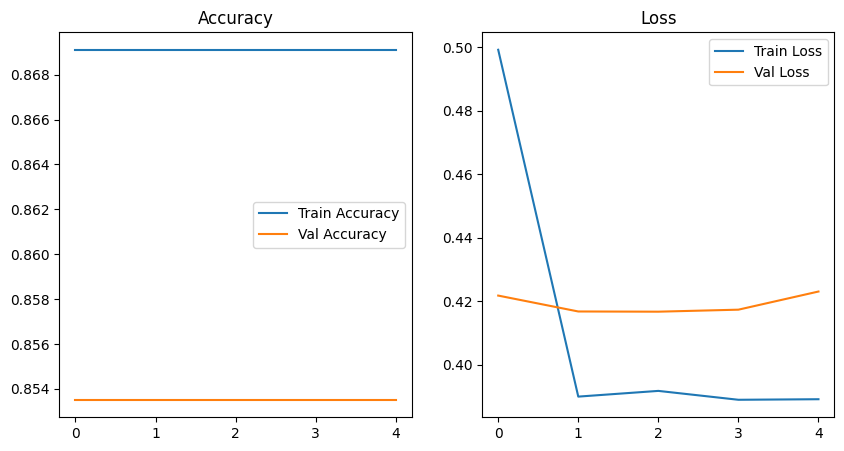

In [65]:
import matplotlib.pyplot as plt
# Plot Accuracy & Loss
plt.figure(figsize=(10,5))
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [29]:
model.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]], dtype=float32)

In [ ]:
# Evaluate
#2229/32=69.5...=70
model.evaluate(X_test,y_test)


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8706 - loss: 0.3868


[0.39685148000717163, 0.8658591508865356]